In [59]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA


class SOM:
    def __init__(self,
                 n_components=2,
                 resolution=20,
                 sigma_max=1.0,
                 sigma_min=0.2,
                 tau=20.0,
                 max_iter=100):
        if n_components != 2:
            raise (NotImplementedError())
        self.n_components = n_components
        self.resolution = resolution
        self.sigma_max = sigma_max
        self.sigma_min = sigma_min
        self.tau = tau
        self.max_iter = max_iter

        self.y = None
        self.z = None
        self.k_star = None
        self.zeta = None
        self.r = None

    def fit(self, data):
        self._initialize(data)
        for t in range(self.max_iter):
            self._e_step(data)
            self._m_step(data, t)

    def _initialize(self, data):
        self.zeta = create_zeta(self.resolution, self.n_components)
        pca = PCA(n_components=self.n_components)
        pca.fit(data)
        self.y = pca.inverse_transform(np.sqrt(pca.explained_variance_)[None, :] * self.zeta)

    def _e_step(self, data):
        self.k_star = np.argmin(cdist(data, self.y, 'sqeuclidean'), axis=1)
        self.z = self.zeta[self.k_star, :]

    def _m_step(self, data, t):
        self.r = np.exp(-0.5 * cdist(self.zeta, self.z, 'sqeuclidean') / (self._sigma(t) ** 2))
        self.y = np.dot(self.r, data) / np.sum(self.r, axis=1)[:, None]

    def _sigma(self, epoch):
        return self.sigma_min + (self.sigma_max - self.sigma_min) * np.exp(- epoch / self.tau)


def create_zeta(resolution, n_components):
    if n_components != 2:
        raise (NotImplementedError())
    mesh1d, step = np.linspace(-1, 1, resolution, endpoint=False, retstep=True)
    mesh1d += step / 2
    meshgrid = np.meshgrid(mesh1d, mesh1d)
    return np.dstack(meshgrid).reshape(-1, 2)

In [31]:
a = np.zeros((400, 1))

In [32]:
b = np.loadtxt("data2.txt")

In [33]:
c = np.concatenate((a,b), axis=1)

In [34]:
c

array([[ 0.        , -1.90915851, -0.06566603],
       [ 0.        , -0.47273021, -0.34102245],
       [ 0.        , -2.39941933,  0.49735619],
       ...,
       [ 0.        , -0.54707477,  0.02907049],
       [ 0.        , -0.41438574, -0.10807388],
       [ 0.        , -2.06765692,  0.21693714]])

In [39]:
pca2 = PCA(2)
pca2.fit(c)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca2.explained_variance_

array([0.4938608 , 0.05956556])

In [41]:
np.sqrt(pca2.explained_variance_)[None, :]

array([[0.7027523 , 0.24406056]])

In [42]:
np.sqrt(pca2.explained_variance_)[None, :]*som.zeta

array([[-0.66761469, -0.23185753],
       [-0.59733946, -0.23185753],
       [-0.52706423, -0.23185753],
       [-0.456789  , -0.23185753],
       [-0.38651377, -0.23185753],
       [-0.31623854, -0.23185753],
       [-0.24596331, -0.23185753],
       [-0.17568808, -0.23185753],
       [-0.10541285, -0.23185753],
       [-0.03513762, -0.23185753],
       [ 0.03513762, -0.23185753],
       [ 0.10541285, -0.23185753],
       [ 0.17568808, -0.23185753],
       [ 0.24596331, -0.23185753],
       [ 0.31623854, -0.23185753],
       [ 0.38651377, -0.23185753],
       [ 0.456789  , -0.23185753],
       [ 0.52706423, -0.23185753],
       [ 0.59733946, -0.23185753],
       [ 0.66761469, -0.23185753],
       [-0.66761469, -0.20745148],
       [-0.59733946, -0.20745148],
       [-0.52706423, -0.20745148],
       [-0.456789  , -0.20745148],
       [-0.38651377, -0.20745148],
       [-0.31623854, -0.20745148],
       [-0.24596331, -0.20745148],
       [-0.17568808, -0.20745148],
       [-0.10541285,

In [43]:
pca2.inverse_transform(np.sqrt(pca2.explained_variance_)[None, :] * som.zeta)

array([[ 0.        , -1.01935636, -0.55784554],
       [ 0.        , -1.07987205, -0.52211797],
       [ 0.        , -1.14038774, -0.4863904 ],
       ...,
       [ 0.        , -1.81237273,  0.44883932],
       [ 0.        , -1.87288842,  0.48456689],
       [ 0.        , -1.93340412,  0.52029445]])

In [14]:
pca = PCA(2)
data = np.loadtxt("data1.txt")
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_

array([0.43258342, 0.05285604])

In [28]:
np.sqrt(pca.explained_variance_)[None, :]

array([[0.65771074, 0.22990442]])

In [25]:
np.sqrt(pca.explained_variance_)[None, :]*som.zeta

array([[-0.6248252 , -0.2184092 ],
       [-0.55905413, -0.2184092 ],
       [-0.49328306, -0.2184092 ],
       [-0.42751198, -0.2184092 ],
       [-0.36174091, -0.2184092 ],
       [-0.29596983, -0.2184092 ],
       [-0.23019876, -0.2184092 ],
       [-0.16442769, -0.2184092 ],
       [-0.09865661, -0.2184092 ],
       [-0.03288554, -0.2184092 ],
       [ 0.03288554, -0.2184092 ],
       [ 0.09865661, -0.2184092 ],
       [ 0.16442769, -0.2184092 ],
       [ 0.23019876, -0.2184092 ],
       [ 0.29596983, -0.2184092 ],
       [ 0.36174091, -0.2184092 ],
       [ 0.42751198, -0.2184092 ],
       [ 0.49328306, -0.2184092 ],
       [ 0.55905413, -0.2184092 ],
       [ 0.6248252 , -0.2184092 ],
       [-0.6248252 , -0.19541875],
       [-0.55905413, -0.19541875],
       [-0.49328306, -0.19541875],
       [-0.42751198, -0.19541875],
       [-0.36174091, -0.19541875],
       [-0.29596983, -0.19541875],
       [-0.23019876, -0.19541875],
       [-0.16442769, -0.19541875],
       [-0.09865661,

In [26]:
pca.inverse_transform(np.sqrt(pca.explained_variance_)[None, :] * som.zeta)

array([[-1.37934285, -2.16875174],
       [-1.41207778, -2.11170563],
       [-1.44481271, -2.05465952],
       [-1.47754763, -1.99761341],
       [-1.51028256, -1.9405673 ],
       [-1.54301749, -1.88352119],
       [-1.57575241, -1.82647508],
       [-1.60848734, -1.76942897],
       [-1.64122227, -1.71238285],
       [-1.67395719, -1.65533674],
       [-1.70669212, -1.59829063],
       [-1.73942705, -1.54124452],
       [-1.77216197, -1.48419841],
       [-1.8048969 , -1.4271523 ],
       [-1.83763183, -1.37010619],
       [-1.87036675, -1.31306008],
       [-1.90310168, -1.25601397],
       [-1.9358366 , -1.19896786],
       [-1.96857153, -1.14192174],
       [-2.00130646, -1.08487563],
       [-1.35940224, -2.15730917],
       [-1.39213717, -2.10026306],
       [-1.4248721 , -2.04321695],
       [-1.45760702, -1.98617084],
       [-1.49034195, -1.92912472],
       [-1.52307688, -1.87207861],
       [-1.5558118 , -1.8150325 ],
       [-1.58854673, -1.75798639],
       [-1.62128166,

In [65]:
som = SOM()
som.fit(data)

In [66]:
som.zeta

array([[-0.95, -0.95],
       [-0.85, -0.95],
       [-0.75, -0.95],
       [-0.65, -0.95],
       [-0.55, -0.95],
       [-0.45, -0.95],
       [-0.35, -0.95],
       [-0.25, -0.95],
       [-0.15, -0.95],
       [-0.05, -0.95],
       [ 0.05, -0.95],
       [ 0.15, -0.95],
       [ 0.25, -0.95],
       [ 0.35, -0.95],
       [ 0.45, -0.95],
       [ 0.55, -0.95],
       [ 0.65, -0.95],
       [ 0.75, -0.95],
       [ 0.85, -0.95],
       [ 0.95, -0.95],
       [-0.95, -0.85],
       [-0.85, -0.85],
       [-0.75, -0.85],
       [-0.65, -0.85],
       [-0.55, -0.85],
       [-0.45, -0.85],
       [-0.35, -0.85],
       [-0.25, -0.85],
       [-0.15, -0.85],
       [-0.05, -0.85],
       [ 0.05, -0.85],
       [ 0.15, -0.85],
       [ 0.25, -0.85],
       [ 0.35, -0.85],
       [ 0.45, -0.85],
       [ 0.55, -0.85],
       [ 0.65, -0.85],
       [ 0.75, -0.85],
       [ 0.85, -0.85],
       [ 0.95, -0.85],
       [-0.95, -0.75],
       [-0.85, -0.75],
       [-0.75, -0.75],
       [-0.

In [44]:
cdist(data, som.y)

array([[0.49819754, 0.47101674, 0.44302478, ..., 0.21137271, 0.20404929,
        0.20097235],
       [0.16609763, 0.119606  , 0.06736515, ..., 0.58959794, 0.59221373,
        0.59457749],
       [1.01553496, 0.96871473, 0.91516655, ..., 0.87689076, 0.84477103,
        0.81646538],
       ...,
       [0.81766751, 0.86484588, 0.91873649, ..., 1.26247348, 1.29053061,
        1.31413943],
       [0.39476535, 0.35366366, 0.30817767, ..., 0.42816162, 0.41823552,
        0.41033394],
       [1.27122177, 1.22401457, 1.17011428, ..., 1.15187392, 1.11893304,
        1.08991599]])

In [51]:
np.size(data, axis=0)

400

In [50]:
np.size(data, axis=1)

2

In [53]:
np.size(som.y, axis=0)

400

In [52]:
np.size(som.y, axis=1)

2

In [47]:
np.size(cdist(data, som.y), axis=0)

400

In [48]:
np.size(cdist(data, som.y), axis=1)

400

In [54]:
np.size(np.argmin(cdist(data, som.y), axis=1), axis=0)

400

In [56]:
np.argmin(cdist(data, som.y), axis=1)

array([274,   3,  97, 341, 139, 279, 386, 214,  19,  37, 135, 146, 172,
        19,  16, 380,  19, 108, 339, 236, 272, 259, 213, 120, 145, 326,
       300, 222, 372,  70,  29, 266,  19, 229,  70, 224, 241, 200, 249,
        99,  32, 373,  28, 265,   8, 210, 292, 373, 119,  98,  56, 159,
       208,  19,  34, 147,  80, 391, 247, 317, 200, 174, 238,  77, 132,
       320,  85, 323,  18, 132, 199,  99,  85, 196,   7,  36,  19, 189,
       101, 132, 203, 233, 306, 206, 340, 380,  13, 279, 190, 360,  30,
       222,  60, 225,  12, 192, 245, 259, 133, 122, 385, 345,  19,  13,
       152, 236, 300,  99, 299, 317, 274, 388,  19, 111,  82, 278,  71,
       113, 320, 256, 154,  36, 224,  56,  29, 393, 119, 396, 232, 303,
        13, 156,  43, 260, 386,  15, 179, 161, 303, 354, 265, 370, 286,
        15, 280, 327, 188, 394, 112,  19,  39,  19,  15,  19, 200, 279,
       240, 272,   4, 380,  91, 299, 169,  82, 233,  94, 200, 192, 228,
       272, 354, 291, 311, 218, 240, 321, 200, 365, 224, 224, 19

In [57]:
np.size(np.argmin(cdist(data, som.y), axis=1))

400

In [71]:
som.r

array([[1.82885018e-19, 3.45121103e-01, 2.19972315e-16, ...,
        6.94614172e-05, 2.24316777e-08, 2.93443249e-19],
       [4.44901206e-18, 6.23238117e-01, 1.08760819e-14, ...,
        6.17173317e-05, 2.11960641e-07, 2.32795488e-17],
       [8.54429117e-17, 8.88512418e-01, 4.24525630e-13, ...,
        4.32910029e-05, 1.58115955e-06, 1.45798145e-15],
       ...,
       [4.89618228e-03, 2.54431255e-29, 2.81376542e-12, ...,
        1.07177142e-20, 1.23610634e-10, 1.82885018e-19],
       [2.14043523e-03, 8.25680466e-31, 2.50006551e-12, ...,
        1.71129441e-22, 2.09898028e-11, 2.60727970e-19],
       [7.38709366e-04, 2.11534186e-32, 1.75364586e-12, ...,
        2.15711995e-24, 2.81376542e-12, 2.93443249e-19]])

In [69]:
np.size(som.r, axis=0)

400

In [70]:
np.size(som.r, axis=1)

400

In [76]:
r = np.sum(som.r, axis=1)[:, None]
r

array([[ 5.78591802],
       [ 7.82283459],
       [ 9.71704391],
       [11.36690869],
       [12.79096981],
       [14.09390309],
       [15.38035158],
       [16.65054507],
       [17.76885949],
       [18.57615265],
       [19.09047796],
       [19.60196744],
       [20.53991599],
       [22.25265455],
       [24.91806311],
       [28.58247941],
       [33.06999297],
       [37.48595676],
       [39.7378226 ],
       [37.37690903],
       [ 7.48498169],
       [ 9.63589598],
       [11.45600193],
       [13.01697097],
       [14.46092425],
       [15.88444534],
       [17.33215315],
       [18.79482639],
       [20.16332245],
       [21.24912491],
       [21.96469594],
       [22.52179693],
       [23.40373871],
       [25.1114371 ],
       [27.91837384],
       [31.77775791],
       [36.26144125],
       [40.26794229],
       [41.74742186],
       [38.52711659],
       [ 9.12953325],
       [11.19716011],
       [12.66115548],
       [13.81003776],
       [14.93542797],
       [16

In [74]:
r = np.sum(som.r, axis=1)[None, :]
r

array([[ 5.78591802,  7.82283459,  9.71704391, 11.36690869, 12.79096981,
        14.09390309, 15.38035158, 16.65054507, 17.76885949, 18.57615265,
        19.09047796, 19.60196744, 20.53991599, 22.25265455, 24.91806311,
        28.58247941, 33.06999297, 37.48595676, 39.7378226 , 37.37690903,
         7.48498169,  9.63589598, 11.45600193, 13.01697097, 14.46092425,
        15.88444534, 17.33215315, 18.79482639, 20.16332245, 21.24912491,
        21.96469594, 22.52179693, 23.40373871, 25.1114371 , 27.91837384,
        31.77775791, 36.26144125, 40.26794229, 41.74742186, 38.52711659,
         9.12953325, 11.19716011, 12.66115548, 13.81003776, 14.93542797,
        16.1264626 , 17.38300723, 18.74553103, 20.20730038, 21.58035   ,
        22.61165727, 23.30453136, 24.07345445, 25.52128245, 28.03414522,
        31.51413701, 35.33868449, 38.32997887, 38.74161585, 34.96726667,
        10.66346243, 12.65111159, 13.73884619, 14.38348998, 15.00411183,
        15.70940891, 16.51611127, 17.57622405, 19.0

In [81]:
k=np.arange(0,4)

In [83]:
data[k,:]

array([[-1.41563962, -1.43136825],
       [-1.73724228, -1.66246434],
       [-1.858045  , -0.82161436],
       [-0.75274065, -2.24195132]])

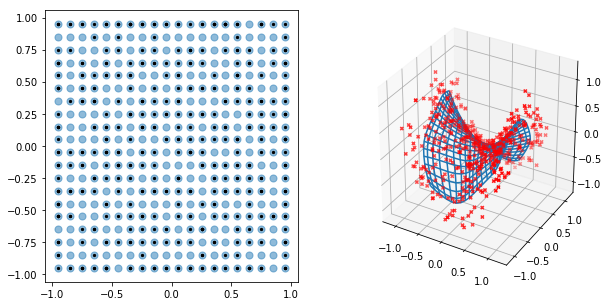

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from SOM import SOM


def main():
    # create data
    input_dim = 3
    latent_dim = 2
    n_samples = 500
    noise = 0.1
    random_seed = 100

    np.random.seed(random_seed)
    z = np.random.uniform(-1, 1, size=(n_samples, latent_dim))
    data = np.empty((n_samples, input_dim))
    data[:, 0] = z[:, 0]
    data[:, 1] = z[:, 1]
    data[:, 2] = z[:, 0] ** 2 - z[:, 1] ** 2
    data += np.random.normal(scale=noise, size=(n_samples, input_dim))

    # learning
    som = SOM()
    som.fit(data)
    zeta = som.zeta
    h = som.r
    
    # plot result
    fig = plt.figure(figsize=(10, 5))
    ax_latent = fig.add_subplot(121)
    ax_latent.scatter(som.zeta[:, 0], som.zeta[:, 1], s=50, alpha=0.5)
    ax_latent.scatter(som.z[:, 0], som.z[:, 1], s=5, color='black')
    wf = som.y.reshape(20, 20, 3)
    ax_observable = fig.add_subplot(122, projection='3d')
    ax_observable.plot_wireframe(wf[:, :, 0], wf[:, :, 1], wf[:, :, 2])
    ax_observable.scatter(data[:, 0], data[:, 1], data[:, 2], marker='x', color='red', s=10)
    plt.show()


if __name__ == '__main__':
    main()